In [107]:
# This walkthrough follows https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

The calculated value of pi: 3.13856


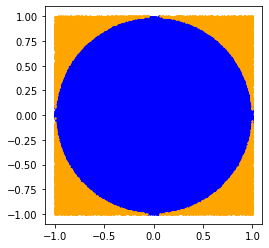

In [108]:
# Simple Monte Carlo Simulation
# Simulate Pi
N = 100_000

points = 2*np.random.rand(N, 2)-1

circleX, circleY, outsideX, outsideY = [], [], [], []
inside, outside = 0, 0
for x, y in points:
    if np.sqrt(x**2 + y**2) <= 1:
        inside +=1
        circleX.append(x)
        circleY.append(y)
    else:
        outside +=1
        outsideX.append(x)
        outsideY.append(y)
        
print("The calculated value of pi: {}".format(4*inside/(inside+outside)))

plt.axes().set_aspect('equal')
plt.scatter(circleX, circleY, 2, 'b')
plt.scatter(outsideX, outsideY, 2, 'orange')

In [109]:
# You are hitting yahoo for real data, this may hang if you run it many times
# you may be running into free API rate limits.
df = data.DataReader(['AAPL', 'META', 'GOOGL', 'AMZN'], 'yahoo', start='2015/01/01', end='2019/12/31')
df.head()

/Users/erikdies/Envs/base39/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'AAPL', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Attributes  Adj Close                               Close                      \
Symbols          META      GOOGL     AMZN AAPL       META      GOOGL     AMZN   
Date                                                                            
2015-01-02  78.449997  26.477501  15.4260  NaN  78.449997  26.477501  15.4260   
2015-01-05  77.190002  25.973000  15.1095  NaN  77.190002  25.973000  15.1095   
2015-01-06  76.150002  25.332001  14.7645  NaN  76.150002  25.332001  14.7645   
2015-01-07  76.150002  25.257500  14.9210  NaN  76.150002  25.257500  14.9210   
2015-01-08  78.180000  25.345501  15.0230  NaN  78.180000  25.345501  15.0230   

Attributes            High             ...      Low            Open  \
Symbols    AAPL       META      GOOGL  ...     AMZN AAPL       META   
Date                                   ...                            
2015-01-02  NaN  78.930000  26.790001  ...  15.3480  NaN  78.580002   
2015-01-05  NaN  79.250000  26.399500  ...  15.0425  NaN  77.980003   
2015-01-06  NaN  77.589996  26.060499  ...  14.6190  NaN  77.230003   
2015-01-07  NaN  77.360001  25.574499  ...  14.7665  NaN  76.760002   
2015-01-08  NaN  78.230003  25.375000  ...  14.8055  NaN  76.739998   

Attributes                               Volume                               
Symbols         GOOGL     AMZN AAPL        META       GOOGL        AMZN AAPL  
Date                                                                          
2015-01-02  26.629999  15.6290  NaN  18177500.0  26480000.0  55664000.0  NaN  
2015-01-05  26.357500  15.3505  NaN  26452200.0  41182000.0  55484000.0  NaN  
2015-01-06  26.025000  15.1120  NaN  27399300.0  54456000.0  70380000.0  NaN  
2015-01-07  25.547501  14.8750  NaN  22045300.0  46918000.0  52806000.0  NaN  
2015-01-08  25.075500  15.0160  NaN  23961000.0  73054000.0  61768000.0  NaN  

[5 rows x 24 columns]

Symbols,META,GOOGL,AMZN,AAPL
Date,,,,
2015-01-02,78.449997,26.477501,15.4260,NaN
2015-01-05,77.190002,25.973000,15.1095,NaN
2015-01-06,76.150002,25.332001,14.7645,NaN
2015-01-07,76.150002,25.257500,14.9210,NaN
2015-01-08,78.180000,25.345501,15.0230,NaN


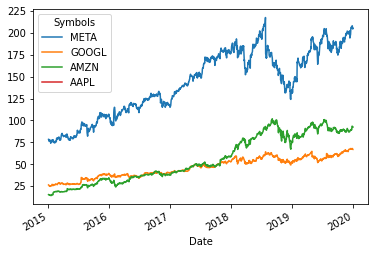

In [110]:
df_close = df['Adj Close']
df_close.plot()
df_close.head()

In [114]:
# Covariance matrix
cov_matrix = df_close.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,META,GOOGL,AMZN
Symbols,,,
META,0.000320,0.000161,0.000186
GOOGL,0.000161,0.000221,0.000176
AMZN,0.000186,0.000176,0.000333


In [115]:
# Correlation matrix
corr_matrix = df_close.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,META,GOOGL,AMZN
Symbols,,,
META,1.000000,0.605827,0.571191
GOOGL,0.605827,1.000000,0.647942
AMZN,0.571191,0.647942,1.000000


In [116]:
# w = {'AAPL': 0.1, 'META': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
# Change this to a computation so that tickers aren't hardcoded
weights = np.random.random(len(df_close.columns))
weights = weights/weights.sum()
w = dict(zip(df_close.columns, weights))
print(w)
assert(sum(w.values()) == 1)
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

{'META': 0.47446591738507526, 'GOOGL': 0.4987942036853775, 'AMZN': 0.02673987892954723}


0.0002130471025343037

In [117]:
# Yearly returns for individual companies
ind_er = df_close.resample('Y').last().pct_change().mean()
ind_er

Symbols
META     0.235412
GOOGL    0.155401
AMZN     0.295903
dtype: float64

In [118]:
# Volatility is given by the annual standard deviation.
# We multiply by 250 because there are 250 trading days in a year.
ann_sd = df_close.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
META     0.282744
GOOGL    0.235281
AMZN     0.288655
dtype: float64

In [119]:
# Creating a table for visualising returns and volatility of assets
assets = pd.concat([ind_er, ann_sd], axis=1) 
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
META,0.235412,0.282744
GOOGL,0.155401,0.235281
AMZN,0.295903,0.288655


In [120]:
# Create some lists to capture the paramters we compute, not all currently used

p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df_close.columns)
N = 10000

for portfolio in range(N):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    _var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    _sd = np.sqrt(_var) # Daily standard deviation
    _ann_sd = _sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(_ann_sd)

In [121]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df_close.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,META weight,GOOGL weight,AMZN weight
0,0.163799,0.230636,0.065018,0.912239,0.022743
1,0.188541,0.227530,0.387054,0.597493,0.015452
2,0.205230,0.225064,0.282516,0.523719,0.193765
3,0.229128,0.230918,0.260228,0.363223,0.376549
4,0.236267,0.240731,0.549211,0.187997,0.262792


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

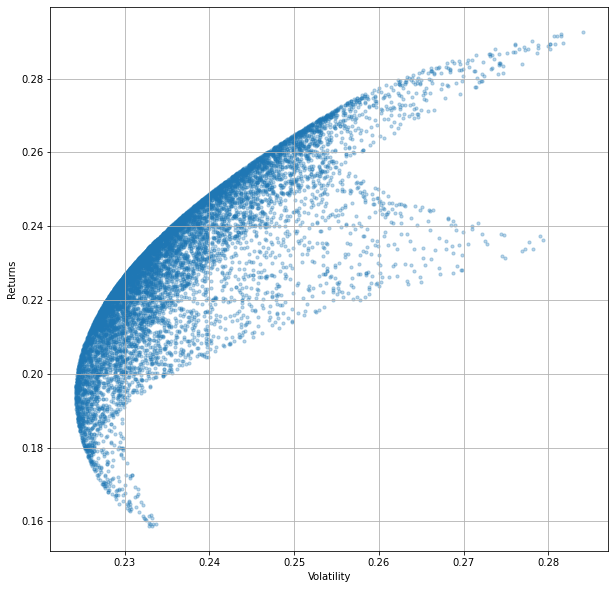

In [122]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [123]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.193444
Volatility      0.224232
META weight     0.221197
GOOGL weight    0.634002
AMZN weight     0.144800
Name: 2938, dtype: float64

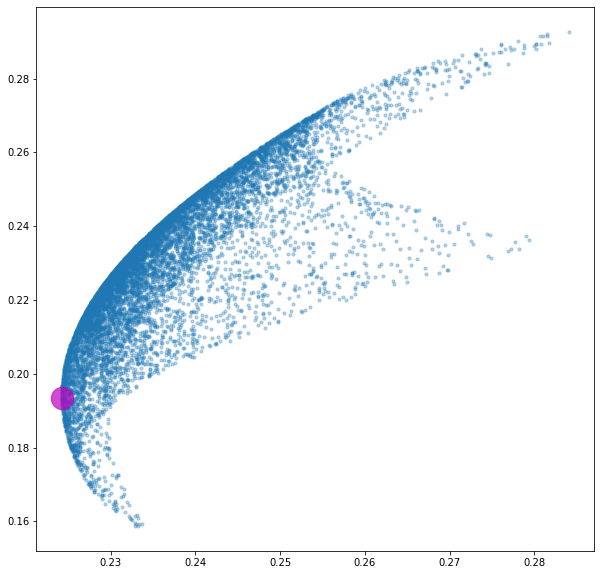

In [124]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='m', marker='o', s=500, alpha=0.7)

## The optimal risky portfolio is the one with the highest Sharpe ratio.
$$ \text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p}$$
Where $R_p$ is return on portfolio, $\sigma_p$ is risk of the portfolio, and $R_f$ is the risk-free rate

In [125]:
# Finding the optimal portfolio
rf = 0.01 # risk free rate of 1%

# Here we are computing the sharpe ratio of all the points, then taking the portfolio with the maximized
# ratio.  The slope of the line through the risk-free asset and the portfolio gives the sharpe ratio,
# so if we maximize the ratio we find the tangent line slope and tangent line point.  Note that this
# computation requires that we probabalistically generated a portfolio somewhat close to the optimal one.
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.275814
Volatility      0.258345
META weight     0.310968
GOOGL weight    0.009096
AMZN weight     0.679935
Name: 493, dtype: float64

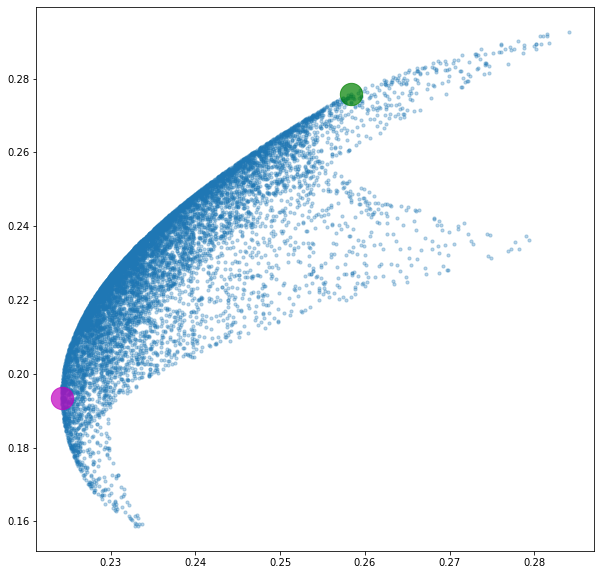

In [126]:
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='m', marker='o', s=500, alpha=0.7)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='o', s=500, alpha=0.7)


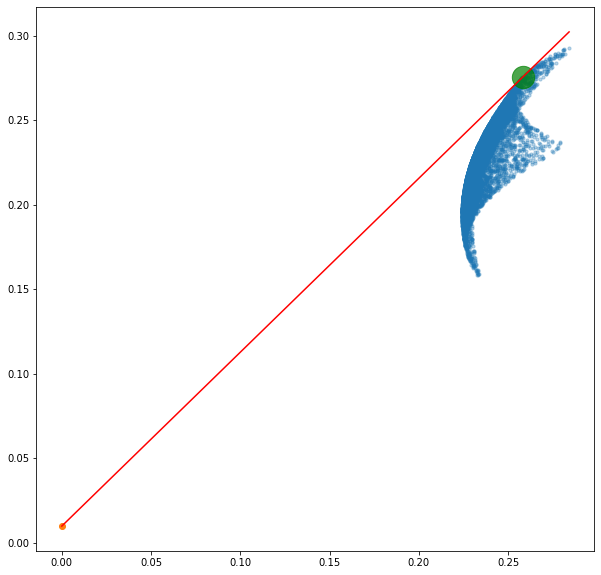

In [127]:
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='o', s=500, alpha=0.7)
plt.scatter(0, rf)
X = np.linspace(0, optimal_risky_port[1]*1.1, 1000)
Y = lambda x: x*(optimal_risky_port[0]-rf)/(optimal_risky_port[1]) + rf
plt.plot(X, Y(X), 'r-')